### DEMAPP08 

# Compute function inverse via collocation

In [1]:
from demos.setup import np, plt, demo
from compecon import BasisChebyshev, NLP, nodeunif
%matplotlib inline

### Approximation structure

In [2]:
n, a, b = 31, 1, 5
F = BasisChebyshev(n, a, b)  # define basis functions
x = F.nodes                  # compute standard nodes

### Residual function

In [3]:
def resid(c):
    F.c = c  # update basis coefficients
    f = F(x) # interpolate at basis nodes x
    return f ** -2 + f ** -5 - 2 * x

### Compute function inverse

In [4]:
c0 = np.zeros(n)  # set initial guess for coeffs
c0[0] = 0.2
problem = NLP(resid)
F.c = problem.broyden(c0)  # compute coeff by Broyden's method

### Plot setup

In [5]:
n = 1000
x = nodeunif(n, a, b)
r = resid(F.c)

### Plot function inverse

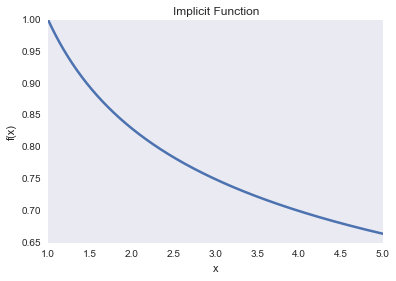

In [6]:
demo.figure('Implicit Function', 'x', 'f(x)')
plt.plot(x, F(x))

### Plot residual

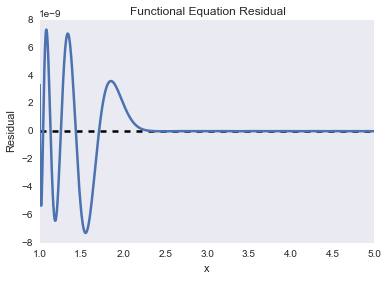

In [7]:
demo.figure('Functional Equation Residual', 'x', 'Residual')
plt.hlines(0, a, b, 'k', '--')
plt.plot(x, r)